# The geometry of efficient codes: how rate-distortion trade-offs distort the latent representations of generative models

This notebook contains the code to reproduce Figures 3 and 6 in the paper:
- arxiv: https://arxiv.org/abs/2406.07269 

## Notation

In the code you will find labels that do no correspond to the names of the models in the paper. However, the following mapping holds:
- `task2`: `E2M1`,
- `task3`: `E2M2`,
- `task1`: `E2M3`,
- `task0`: `E2M4`,
- `taskAll`: `E2M5`,
- `bottomBias`: `E1M1`,
- `alignBias`: `E1M2`

## Tensorboard Logs


### Load from Tensorboard.dev (deprecated)

- complete experiment link: https://tensorboard.dev/experiment/1mH1grX3RUGWa2noiot3VQ/

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorboard as tb

experiment_id = "1mH1grX3RUGWa2noiot3VQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df


,run,tag,step,value
0,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,49,0.002265
1,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,99,0.003376
2,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,149,0.006109
3,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,199,0.008490
4,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,249,0.009759
...,...,...,...,...
105974,latent_clf/Latent_CLF_task3/max_c_6,val_loss,2657,0.244774
105975,latent_clf/Latent_CLF_task3/max_c_6,val_loss,3986,0.246749
105976,latent_clf/Latent_CLF_task3/max_c_6,val_loss,5315,0.245916
105977,latent_clf/Latent_CLF_task3/max_c_6,val_loss,6644,0.245875


In [ ]:
import pandas as pd
data = pd.DataFrame([], columns=df.columns)


# Select only the last value of the training
for a, b in df.groupby(['run', 'tag']):

    data = pd.concat(
        [data, b.iloc[-1, :].to_frame().T],
        axis=0
    )

data = data[~data.run.str.endswith('max_c_2')]
data

,run,tag,step,value
69,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,3499,0.2951
139,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,Reconstruction_Loss,3499,0.145482
215,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,epoch,3515,5.0
216,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,hp_metric,0,-1.0
286,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,loss,3499,0.147908
...,...,...,...,...
105801,latent_clf/Latent_CLF_task3/max_c_6,hp_metric,0,-1.0
105960,latent_clf/Latent_CLF_task3/max_c_6,loss,7949,0.221603
105966,latent_clf/Latent_CLF_task3/max_c_6,lr-Adam,6645,0.000295
105972,latent_clf/Latent_CLF_task3/max_c_6,val_f1_score,7973,0.918719


In [ ]:
data

In [ ]:
tmp = data[data.run.str.startswith('BetaVAE_MultiCLF/max')].copy()
tmp = tmp[~tmp.run.str.endswith('_ent')].copy()
tmp = tmp[tmp.tag=='val_rec_loss'].copy()
tmp

,run,tag,step,value
43723,BetaVAE_MultiCLF/max_c_0.3,val_rec_loss,7973,0.148281
48027,BetaVAE_MultiCLF/max_c_1,val_rec_loss,7973,0.134099
50179,BetaVAE_MultiCLF/max_c_10,val_rec_loss,7973,0.056986
54483,BetaVAE_MultiCLF/max_c_3,val_rec_loss,7973,0.112612
56635,BetaVAE_MultiCLF/max_c_6,val_rec_loss,7973,0.073043


### Load from local logs

In [2]:
import pandas as pd
df = pd.read_csv('../logs/tb_export/_fromPandas_1mH1grX3RUGWa2noiot3VQ.csv')

data = pd.DataFrame([], columns=df.columns)


# Select only the last value of the training
for a, b in df.groupby(['run', 'tag']):

    data = pd.concat(
        [data, b.iloc[-1, :].to_frame().T],
        axis=0
    )

data = data[~data.run.str.endswith('max_c_2')]
data

,run,tag,step,value
69,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,KLD,3499,0.2951
139,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,Reconstruction_Loss,3499,0.145482
215,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,epoch,3515,5.0
216,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,hp_metric,0,-1.0
286,BetaVAE_AlignBias3000vs300_2Corridors/max_c_0.3,loss,3499,0.147908
...,...,...,...,...
105801,latent_clf/Latent_CLF_task3/max_c_6,hp_metric,0,-1.0
105960,latent_clf/Latent_CLF_task3/max_c_6,loss,7949,0.221603
105966,latent_clf/Latent_CLF_task3/max_c_6,lr-Adam,6645,0.000295
105972,latent_clf/Latent_CLF_task3/max_c_6,val_f1_score,7973,0.918719


## Original Figures

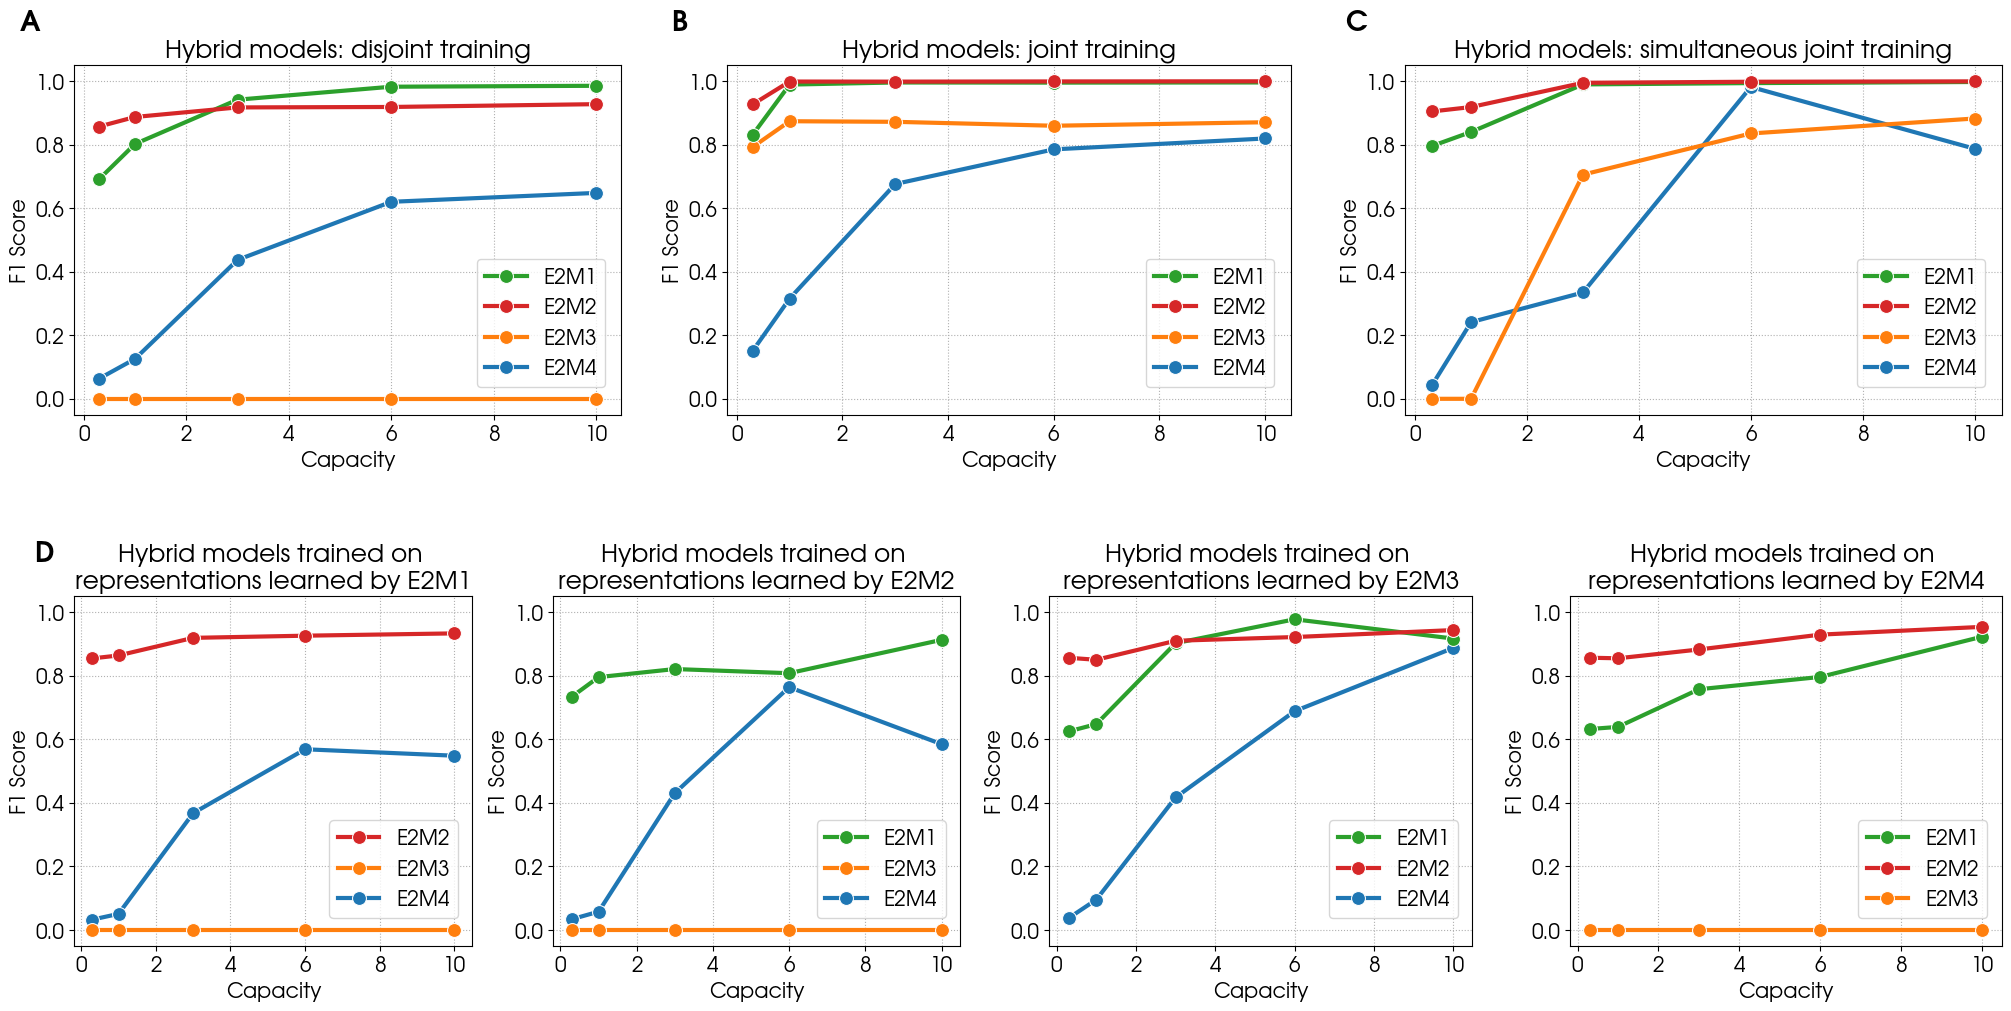

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rcParams["font.family"] = "URW Gothic"

sns_kwargs = {
    'marker': 'o',
    'markersize': 10,
}

def apply_common_settings(ax, letter=''):
    ax.set_ylim(-0.05, 1.05)
    ax.grid(linestyle=':')
    ax.text(-0.1, 1.1, letter, transform=ax.transAxes, fontdict={'size': 20, 'weight': 'bold'})
    for line in ax.get_lines():
        line.set_linewidth(3)
    for text in ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().texts:
        text.set_fontsize(15)
    ax.set_xlabel('Capacity', fontsize=15)
    ax.set_ylabel('F1 Score', fontsize=15)
    ax.set_title(ax.get_title(), fontsize=18)
    #map legend labels
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        new_labels.append(legend_labels[label])
    tmp0 = {k:v for k,v in zip(handles, new_labels)}
    tmp1 = sorted(tmp0, key=tmp0.get)
    ax.legend(
        tmp1, 
        [tmp0[k] for k in tmp1], 
        loc='lower right', 
        prop={'size': 15},
        bbox_to_anchor=(.99, .05),
    )

palette = {
    'clf_task0': 'tab:blue',
    'clf_task1': 'tab:orange',
    'clf_task2': 'tab:green',
    'clf_task3': 'tab:red',
    'Latent_CLF_task0': 'tab:blue',
    'Latent_CLF_task1': 'tab:orange',
    'Latent_CLF_task2': 'tab:green',
    'Latent_CLF_task3': 'tab:red',
    'BetaVAE_CLF_task0': 'tab:blue',
    'BetaVAE_CLF_task0_vaefirst': 'tab:blue',
    'BetaVAE_CLF_task1': 'tab:orange',
    'BetaVAE_CLF_task2': 'tab:green',
    'BetaVAE_CLF_task3': 'tab:red',
    'val_f1_0': 'tab:blue',
    'val_f1_1': 'tab:orange',
    'val_f1_2': 'tab:green',
    'val_f1_3': 'tab:red',
}

# legend_labels = {
#     'clf_task0': 'task0',
#     'clf_task1': 'task1',
#     'clf_task2': 'task2',
#     'clf_task3': 'task3',
#     'Latent_CLF_task0': 'task0',
#     'Latent_CLF_task1': 'task1',
#     'Latent_CLF_task2': 'task2',
#     'Latent_CLF_task3': 'task3',
#     'BetaVAE_CLF_task0': 'task0',
#     'BetaVAE_CLF_task0_vaefirst': 'task0',
#     'BetaVAE_CLF_task1': 'task1',
#     'BetaVAE_CLF_task2': 'task2',
#     'BetaVAE_CLF_task3': 'task3',
#     'val_f1_0': 'task0',
#     'val_f1_1': 'task1',
#     'val_f1_2': 'task2',
#     'val_f1_3': 'task3',
# }

legend_labels = {
    'clf_task0': 'E2M4',
    'clf_task1': 'E2M3',
    'clf_task2': 'E2M1',
    'clf_task3': 'E2M2',
    'Latent_CLF_task0': 'E2M4',
    'Latent_CLF_task1': 'E2M3',
    'Latent_CLF_task2': 'E2M1',
    'Latent_CLF_task3': 'E2M2',
    'BetaVAE_CLF_task0': 'E2M4',
    'BetaVAE_CLF_task0_vaefirst': 'E2M4',
    'BetaVAE_CLF_task1': 'E2M3',
    'BetaVAE_CLF_task2': 'E2M1',
    'BetaVAE_CLF_task3': 'E2M2',
    'val_f1_0': 'E2M4',
    'val_f1_1': 'E2M3',
    'val_f1_2': 'E2M1',
    'val_f1_3': 'E2M2',
}

fig = plt.figure(figsize=(20, 10), constrained_layout=True)

############ Unsupervised + CLF
ax = plt.subplot2grid((2, 12), (0, 0), colspan=4)
tmp = data[data.run.str.startswith('latent_clf')].copy()
tmp = tmp[~tmp.run.str.endswith('non_linear')].copy()
tmp = tmp[tmp.tag=='val_f1_score'].copy()
tmp[['exp', 'task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: disjoint training')
apply_common_settings(ax, letter='A')


############ VAE+1clf
ax = plt.subplot2grid((2, 12), (0, 4), colspan=4)
tmp = data[data.run.str.startswith('BetaVAE_CLF_task')].copy()
tmp = tmp[~tmp.run.str.startswith('BetaVAE_CLF_task0_vaefirst/')].copy()
tmp = tmp[tmp.tag=='val_f1_score'].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: joint training')
apply_common_settings(ax, letter='B')

############ VAE+4clf
ax = plt.subplot2grid((2, 12), (0, 8), colspan=4)
tmp = data[data.run.str.startswith('BetaVAE_MultiCLF/max')].copy()
tmp = tmp[~tmp.run.str.endswith('_ent')].copy()
tmp = tmp[tmp.tag.str.startswith('val_f1')].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='tag',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: simultaneous joint training')
apply_common_settings(ax, letter='C')


############ Other task test

tmp = data[data.run.str.startswith('cross_latent_clf')].copy()
tmp[['exp', 'latent_repr', 'task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp = tmp[tmp.tag=='val_f1_score']#.sort_values('task', ascending=1)

lat_reprs = sorted(tmp.latent_repr.unique())
lat_reprs2label = {
    'ReprTask0': 'E2M4',
    'ReprTask1': 'E2M3',
    'ReprTask2': 'E2M1',
    'ReprTask3': 'E2M2',
}

for i, lat_repr in enumerate(sorted(lat_reprs2label, key=lat_reprs2label.get)):

    ax = plt.subplot2grid((2, 12), (1, 3*i), colspan=3)

    sns.lineplot(
        data=tmp[tmp.latent_repr==lat_repr],
        x='max_c',
        y='value',
        hue='task',
        palette=palette,
        ax=ax,
        **sns_kwargs
    )

    # set legend location
    ax.set_title(f'Hybrid models trained on \nrepresentations learned by {lat_reprs2label[lat_repr]}')
    letter = '\n\nD' if i==0 else ''
    apply_common_settings(ax, letter=letter)

plt.show()

In [72]:
fig.savefig('fig4paper/f1_all.pdf')

---

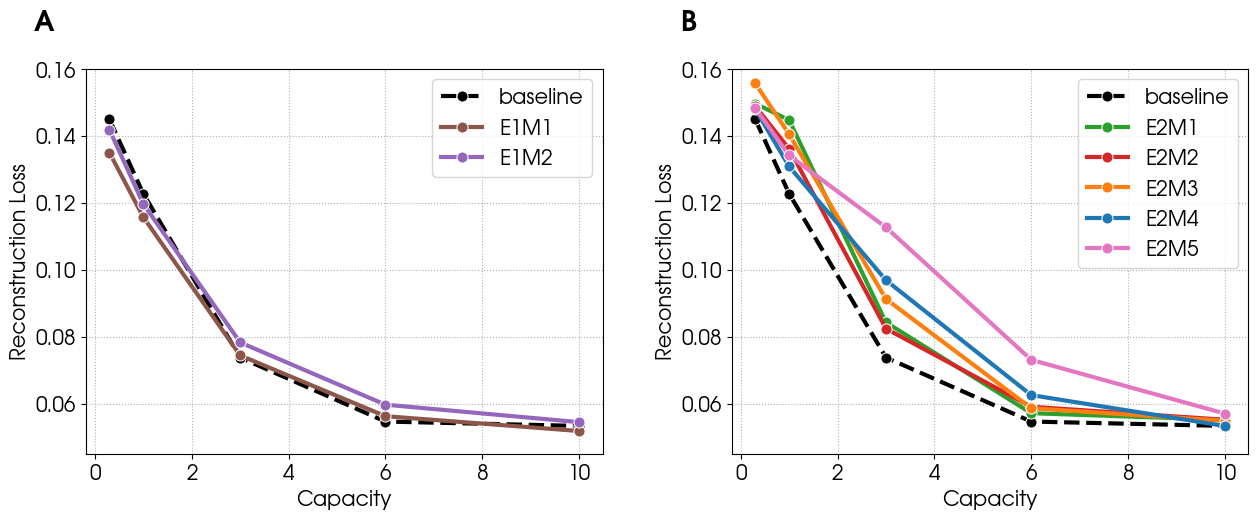

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rcParams["font.family"] = "URW Gothic"

sns_kwargs = {
    'marker': 'o',
    'markersize': 8,
}

def apply_common_settings(ax, letter=''):
    ax.set_ylim(0.045, 0.16)
    ax.grid(linestyle=':')
    ax.text(-0.1, 1.1, letter, transform=ax.transAxes, fontdict={'size': 20, 'weight': 'bold'})
    for line in ax.get_lines():
        line.set_linewidth(3)
    for text in ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().texts:
        text.set_fontsize(15)
    ax.set_xlabel('Capacity', fontsize=15)
    ax.set_ylabel('Reconstruction Loss', fontsize=15)
    ax.set_title(ax.get_title(), fontsize=18)
    #map legend labels
    handles, labels = ax.get_legend_handles_labels()
    # h2l = {h: l for h, l in zip(handles, labels)}
    # new_labels = []
    # for h in sorted(h2l, key=h2l.get):
    #     new_labels.append(legend_labels[h2l[h]])
    ax.legend(
        handles, 
        labels,
        prop={'size': 15}
    )#, loc='lower right', prop={'size': 15})

palette = {
    'clf_task0': 'tab:blue',
    'clf_task1': 'tab:orange',
    'clf_task2': 'tab:green',
    'clf_task3': 'tab:red',
    'Latent_CLF_task0': 'tab:blue',
    'Latent_CLF_task1': 'tab:orange',
    'Latent_CLF_task2': 'tab:green',
    'Latent_CLF_task3': 'tab:red',
    'BetaVAE_CLF_task0': 'tab:blue',
    'BetaVAE_CLF_task0_vaefirst': 'tab:blue',
    'BetaVAE_CLF_task1': 'tab:orange',
    'BetaVAE_CLF_task2': 'tab:green',
    'BetaVAE_CLF_task3': 'tab:red',
    'val_f1_0': 'tab:blue',
    'val_f1_1': 'tab:orange',
    'val_f1_2': 'tab:green',
    'val_f1_3': 'tab:red',
    'val_rec_loss': 'tab:pink',
    'BetaVAE_MultiCLF': 'tab:pink',
    'BetaVAE_AlignBias3000vs300_2Corridors': 'tab:purple',
    'BetaVAE_BottomBiasL2000R260_2Corridors': 'tab:brown',
    'BetaVAE_Unbiased_2Corridors': 'black',
}
    
palette2 = {
    'E1M1': 'tab:brown',
    'E1M2': 'tab:purple',
    'E2M1': 'tab:green',
    'E2M2': 'tab:red',
    'E2M3': 'tab:orange',
    'E2M4': 'tab:blue',
    'E2M5': 'tab:pink',
    'baseline': 'black',
}
    
# legend_labels = {
#     'clf_task0': 'task0',
#     'clf_task1': 'task1',
#     'clf_task2': 'task2',
#     'clf_task3': 'task3',
#     'Latent_CLF_task0': 'task0',
#     'Latent_CLF_task1': 'task1',
#     'Latent_CLF_task2': 'task2',
#     'Latent_CLF_task3': 'task3',
#     'BetaVAE_CLF_task0': 'task0',
#     'BetaVAE_CLF_task0_vaefirst': 'task0',
#     'BetaVAE_CLF_task1': 'task1',
#     'BetaVAE_CLF_task2': 'task2',
#     'BetaVAE_CLF_task3': 'task3',
#     'val_f1_0': 'task0',
#     'val_f1_1': 'task1',
#     'val_f1_2': 'task2',
#     'val_f1_3': 'task3',
#     'val_rec_loss': 'all tasks',
#     'BetaVAE_AlignBias3000vs300_2Corridors': 'AlignBias',
#     'BetaVAE_BottomBiasL2000R260_2Corridors': 'BottomBias',
#     'BetaVAE_Unbiased_2Corridors': r'$\beta$-vae only',
# }


legend_labels = {
    'clf_task0': 'E2M4',
    'clf_task1': 'E2M3',
    'clf_task2': 'E2M1',
    'clf_task3': 'E2M2',
    'Latent_CLF_task0': 'E2M4',
    'Latent_CLF_task1': 'E2M3',
    'Latent_CLF_task2': 'E2M1',
    'Latent_CLF_task3': 'E2M2',
    'BetaVAE_CLF_task0': 'E2M4',
    'BetaVAE_CLF_task0_vaefirst': 'E2M4',
    'BetaVAE_CLF_task1': 'E2M3',
    'BetaVAE_CLF_task2': 'E2M1',
    'BetaVAE_CLF_task3': 'E2M2',
    'val_f1_0': 'E2M4',
    'val_f1_1': 'E2M3',
    'val_f1_2': 'E2M1',
    'val_f1_3': 'E2M2',
    'BetaVAE_MultiCLF': 'E2M5',
    'val_rec_loss': 'E2M5',
    'BetaVAE_AlignBias3000vs300_2Corridors': 'E1M2',
    'BetaVAE_BottomBiasL2000R260_2Corridors': 'E1M1',
    'BetaVAE_Unbiased_2Corridors': 'baseline',
}

fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs = axs.flatten()

############ Other task test

tmp = data[
    (data.run.str.contains('Unbiased', regex=1)) &
    (data.tag=='val_Reconstruction_Loss')
].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

for ax in axs:

    sns.lineplot(
        data=tmp,
        x='max_c',
        y='value',
        hue='task_renamed',
        #palette=palette,
        ax=ax,
        #label=r'$\beta$-vae only',
        linestyle='--',
        palette=palette2,
        **sns_kwargs
    )
    
############ Stat bias tasks
ax = axs[0]

tmp = data[
    (data.run.str.contains('Bias', regex=1)) &
    (data.tag=='val_Reconstruction_Loss')
].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task_renamed',
    palette=palette2,
    ax=ax,
    **sns_kwargs
)
#ax.set_title(r'$\beta$-vae + unbalanced datasets')
apply_common_settings(ax, letter='A')


############ clf tasks
ax = axs[1]

tmp = data[
    data.run.str.startswith('BetaVAE_CLF_task') | 
    data.run.str.startswith('BetaVAE_MultiCLF/max')    
].copy()
tmp = tmp[~tmp.run.str.endswith('_ent')]
tmp = tmp[~tmp.run.str.startswith('BetaVAE_CLF_task0_vaefirst/')].copy()
tmp = tmp[tmp.tag.isin(['val_Reconstruction_Loss', 'val_rec_loss'])].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task_renamed',
    palette=palette2,
    ax=ax,
    **sns_kwargs
)
#ax.set_title(r'$\beta$-vae + 1 classifier')
apply_common_settings(ax, letter='B')

plt.subplots_adjust(wspace=0.25)

plt.show()

In [70]:
fig.savefig('fig4paper/rec_loss_all.pdf', bbox_inches='tight')

## New figures after PLOS review 

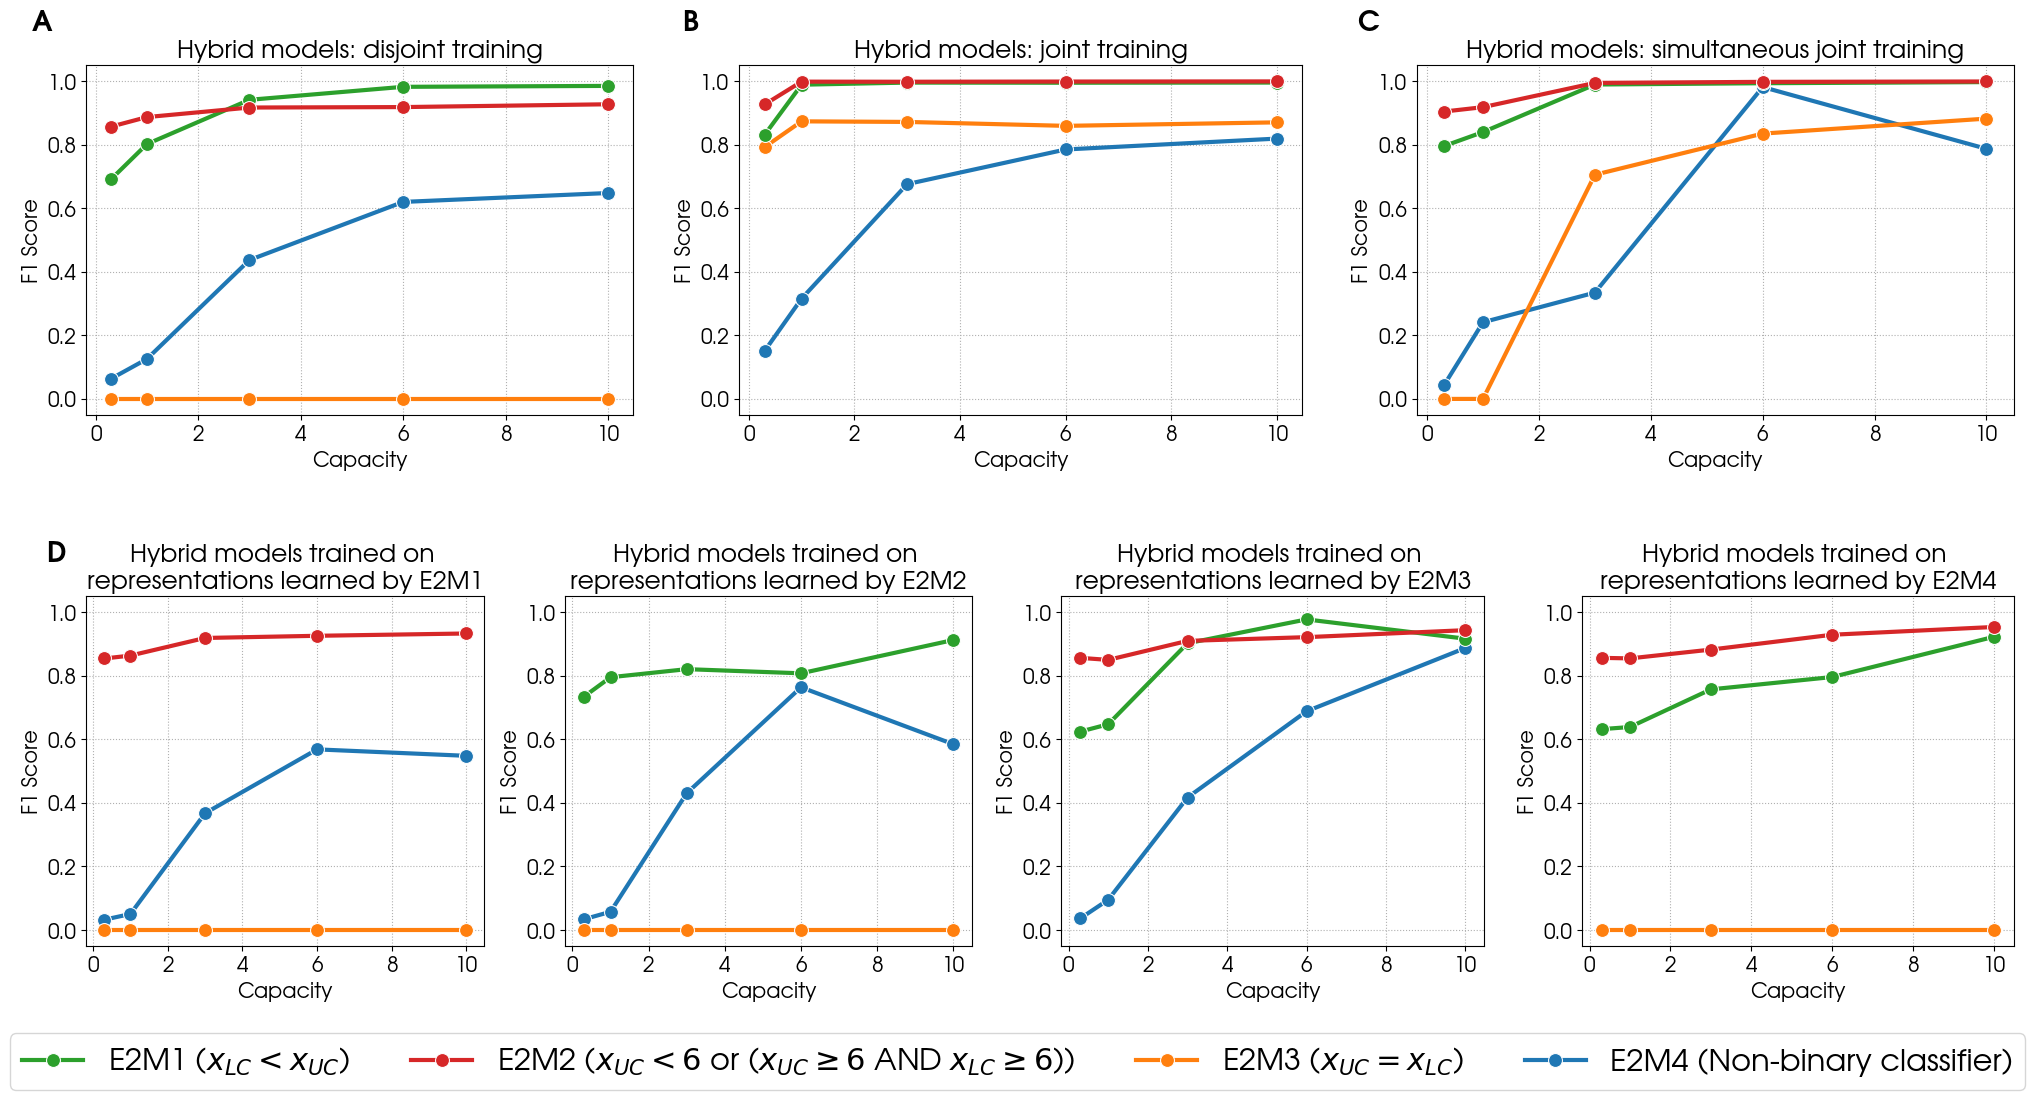

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rcParams["font.family"] = "URW Gothic"

sns_kwargs = {
    'marker': 'o',
    'markersize': 10,
    #'legend': False,
}

def apply_common_settings(ax, letter=''):
    ax.set_ylim(-0.05, 1.05)
    ax.grid(linestyle=':')
    ax.text(-0.1, 1.1, letter, transform=ax.transAxes, fontdict={'size': 20, 'weight': 'bold'})
    for line in ax.get_lines():
        line.set_linewidth(3)
    for text in ax.get_xticklabels() + ax.get_yticklabels():
        text.set_fontsize(15)
    ax.set_xlabel('Capacity', fontsize=15)
    ax.set_ylabel('F1 Score', fontsize=15)
    ax.set_title(ax.get_title(), fontsize=18)
    ax.get_legend().remove()

palette = {
    'clf_task0': 'tab:blue',
    'clf_task1': 'tab:orange',
    'clf_task2': 'tab:green',
    'clf_task3': 'tab:red',
    'Latent_CLF_task0': 'tab:blue',
    'Latent_CLF_task1': 'tab:orange',
    'Latent_CLF_task2': 'tab:green',
    'Latent_CLF_task3': 'tab:red',
    'BetaVAE_CLF_task0': 'tab:blue',
    'BetaVAE_CLF_task0_vaefirst': 'tab:blue',
    'BetaVAE_CLF_task1': 'tab:orange',
    'BetaVAE_CLF_task2': 'tab:green',
    'BetaVAE_CLF_task3': 'tab:red',
    'val_f1_0': 'tab:blue',
    'val_f1_1': 'tab:orange',
    'val_f1_2': 'tab:green',
    'val_f1_3': 'tab:red',
}

# legend_labels = {
#     'clf_task0': 'task0',
#     'clf_task1': 'task1',
#     'clf_task2': 'task2',
#     'clf_task3': 'task3',
#     'Latent_CLF_task0': 'task0',
#     'Latent_CLF_task1': 'task1',
#     'Latent_CLF_task2': 'task2',
#     'Latent_CLF_task3': 'task3',
#     'BetaVAE_CLF_task0': 'task0',
#     'BetaVAE_CLF_task0_vaefirst': 'task0',
#     'BetaVAE_CLF_task1': 'task1',
#     'BetaVAE_CLF_task2': 'task2',
#     'BetaVAE_CLF_task3': 'task3',
#     'val_f1_0': 'task0',
#     'val_f1_1': 'task1',
#     'val_f1_2': 'task2',
#     'val_f1_3': 'task3',
# }

legend_labels = {
    'clf_task0': 'E2M4',
    'clf_task1': 'E2M3',
    'clf_task2': 'E2M1',
    'clf_task3': 'E2M2',
    'Latent_CLF_task0': 'E2M4',
    'Latent_CLF_task1': 'E2M3',
    'Latent_CLF_task2': 'E2M1',
    'Latent_CLF_task3': 'E2M2',
    'BetaVAE_CLF_task0': 'E2M4',
    'BetaVAE_CLF_task0_vaefirst': 'E2M4',
    'BetaVAE_CLF_task1': 'E2M3',
    'BetaVAE_CLF_task2': 'E2M1',
    'BetaVAE_CLF_task3': 'E2M2',
    'val_f1_0': 'E2M4',
    'val_f1_1': 'E2M3',
    'val_f1_2': 'E2M1',
    'val_f1_3': 'E2M2',
}
new_labels = {
    'E2M4': 'E2M4 (Non-binary classifier)',
    'E2M3': 'E2M3 ($x_{UC}=x_{LC}$)',
    'E2M1': 'E2M1 ($x_{LC}<x_{UC}$)',
    'E2M2': 'E2M2 ($x_{UC} <6$ or ($x_{UC} \geq 6$ AND $x_{LC} \geq 6$))',
}
legend_labels = {k: new_labels[v] for k, v in legend_labels.items()}

fig = plt.figure(figsize=(20, 10), constrained_layout=True)

############ Unsupervised + CLF
ax = plt.subplot2grid((2, 12), (0, 0), colspan=4)
tmp = data[data.run.str.startswith('latent_clf')].copy()
tmp = tmp[~tmp.run.str.endswith('non_linear')].copy()
tmp = tmp[tmp.tag=='val_f1_score'].copy()
tmp[['exp', 'task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: disjoint training')
handles, labels = ax.get_legend_handles_labels()
apply_common_settings(ax, letter='A')

############ VAE+1clf
ax = plt.subplot2grid((2, 12), (0, 4), colspan=4)
tmp = data[data.run.str.startswith('BetaVAE_CLF_task')].copy()
tmp = tmp[~tmp.run.str.startswith('BetaVAE_CLF_task0_vaefirst/')].copy()
tmp = tmp[tmp.tag=='val_f1_score'].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: joint training')
apply_common_settings(ax, letter='B')

############ VAE+4clf
ax = plt.subplot2grid((2, 12), (0, 8), colspan=4)
tmp = data[data.run.str.startswith('BetaVAE_MultiCLF/max')].copy()
tmp = tmp[~tmp.run.str.endswith('_ent')].copy()
tmp = tmp[tmp.tag.str.startswith('val_f1')].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='tag',
    palette=palette,
    ax=ax,
    **sns_kwargs
)
ax.set_title(r'Hybrid models: simultaneous joint training')
apply_common_settings(ax, letter='C')


############ Other task test

tmp = data[data.run.str.startswith('cross_latent_clf')].copy()
tmp[['exp', 'latent_repr', 'task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp = tmp[tmp.tag=='val_f1_score']#.sort_values('task', ascending=1)

lat_reprs = sorted(tmp.latent_repr.unique())
lat_reprs2label = {
    'ReprTask0': 'E2M4',
    'ReprTask1': 'E2M3',
    'ReprTask2': 'E2M1',
    'ReprTask3': 'E2M2',
}

for i, lat_repr in enumerate(sorted(lat_reprs2label, key=lat_reprs2label.get)):

    ax = plt.subplot2grid((2, 12), (1, 3*i), colspan=3)

    sns.lineplot(
        data=tmp[tmp.latent_repr==lat_repr],
        x='max_c',
        y='value',
        hue='task',
        palette=palette,
        ax=ax,
        **sns_kwargs
    )

    # set legend location
    ax.set_title(f'Hybrid models trained on \nrepresentations learned by {lat_reprs2label[lat_repr]}')
    letter = '\n\nD' if i==0 else ''
    apply_common_settings(ax, letter=letter)

#set figure legend
new_labels = []
for label in labels:
    new_labels.append(legend_labels[label])
tmp0 = {k:v for k,v in zip(handles, new_labels)}
tmp1 = sorted(tmp0, key=tmp0.get)
fig.legend(
    tmp1, 
    [tmp0[k] for k in tmp1], 
    loc='lower center', 
    prop={'size': 22},
    bbox_to_anchor=(.5, -.1),
    ncol=4,
)

plt.show()

In [65]:
fig.savefig('fig4paper/rev_f1_all.pdf', bbox_inches='tight')

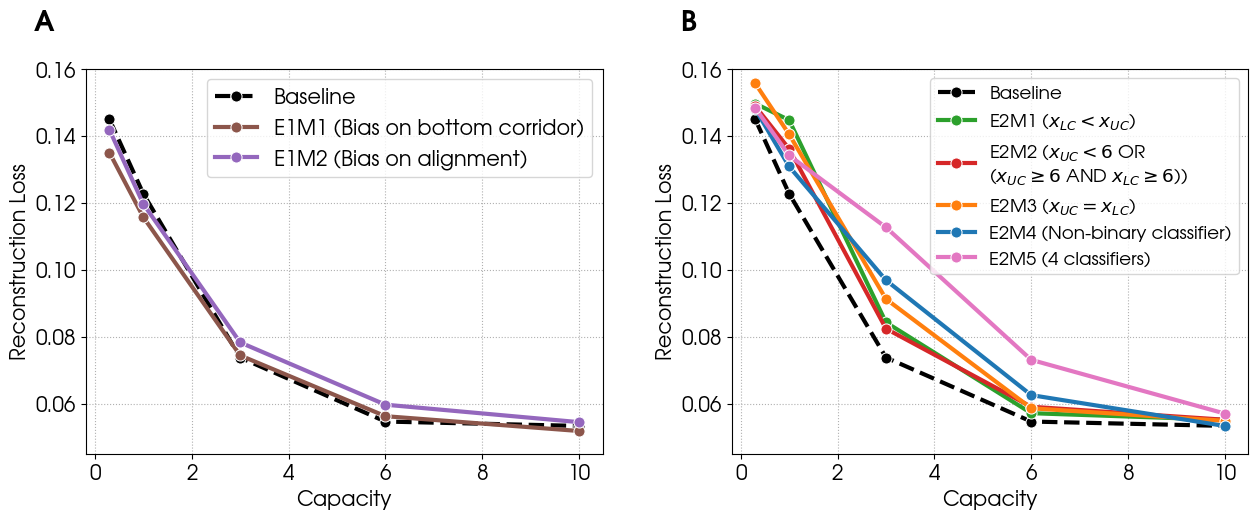

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rcParams["font.family"] = "URW Gothic"

sns_kwargs = {
    'marker': 'o',
    'markersize': 8,
}

def apply_common_settings(ax, letter=''):
    ax.set_ylim(0.045, 0.16)
    ax.grid(linestyle=':')
    ax.text(-0.1, 1.1, letter, transform=ax.transAxes, fontdict={'size': 20, 'weight': 'bold'})
    for line in ax.get_lines():
        line.set_linewidth(3)
    for text in ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().texts:
        text.set_fontsize(15)
    ax.set_xlabel('Capacity', fontsize=15)
    ax.set_ylabel('Reconstruction Loss', fontsize=15)
    ax.set_title(ax.get_title(), fontsize=18)


palette = {
    'clf_task0': 'tab:blue',
    'clf_task1': 'tab:orange',
    'clf_task2': 'tab:green',
    'clf_task3': 'tab:red',
    'Latent_CLF_task0': 'tab:blue',
    'Latent_CLF_task1': 'tab:orange',
    'Latent_CLF_task2': 'tab:green',
    'Latent_CLF_task3': 'tab:red',
    'BetaVAE_CLF_task0': 'tab:blue',
    'BetaVAE_CLF_task0_vaefirst': 'tab:blue',
    'BetaVAE_CLF_task1': 'tab:orange',
    'BetaVAE_CLF_task2': 'tab:green',
    'BetaVAE_CLF_task3': 'tab:red',
    'val_f1_0': 'tab:blue',
    'val_f1_1': 'tab:orange',
    'val_f1_2': 'tab:green',
    'val_f1_3': 'tab:red',
    'val_rec_loss': 'tab:pink',
    'BetaVAE_MultiCLF': 'tab:pink',
    'BetaVAE_AlignBias3000vs300_2Corridors': 'tab:purple',
    'BetaVAE_BottomBiasL2000R260_2Corridors': 'tab:brown',
    'BetaVAE_Unbiased_2Corridors': 'black',
}
    
palette2 = {
    'E1M1': 'tab:brown',
    'E1M2': 'tab:purple',
    'E2M1': 'tab:green',
    'E2M2': 'tab:red',
    'E2M3': 'tab:orange',
    'E2M4': 'tab:blue',
    'E2M5': 'tab:pink',
    'baseline': 'black',
}
    
# legend_labels = {
#     'clf_task0': 'task0',
#     'clf_task1': 'task1',
#     'clf_task2': 'task2',
#     'clf_task3': 'task3',
#     'Latent_CLF_task0': 'task0',
#     'Latent_CLF_task1': 'task1',
#     'Latent_CLF_task2': 'task2',
#     'Latent_CLF_task3': 'task3',
#     'BetaVAE_CLF_task0': 'task0',
#     'BetaVAE_CLF_task0_vaefirst': 'task0',
#     'BetaVAE_CLF_task1': 'task1',
#     'BetaVAE_CLF_task2': 'task2',
#     'BetaVAE_CLF_task3': 'task3',
#     'val_f1_0': 'task0',
#     'val_f1_1': 'task1',
#     'val_f1_2': 'task2',
#     'val_f1_3': 'task3',
#     'val_rec_loss': 'all tasks',
#     'BetaVAE_AlignBias3000vs300_2Corridors': 'AlignBias',
#     'BetaVAE_BottomBiasL2000R260_2Corridors': 'BottomBias',
#     'BetaVAE_Unbiased_2Corridors': r'$\beta$-vae only',
# }


legend_labels = {
    'clf_task0': 'E2M4',
    'clf_task1': 'E2M3',
    'clf_task2': 'E2M1',
    'clf_task3': 'E2M2',
    'Latent_CLF_task0': 'E2M4',
    'Latent_CLF_task1': 'E2M3',
    'Latent_CLF_task2': 'E2M1',
    'Latent_CLF_task3': 'E2M2',
    'BetaVAE_CLF_task0': 'E2M4',
    'BetaVAE_CLF_task0_vaefirst': 'E2M4',
    'BetaVAE_CLF_task1': 'E2M3',
    'BetaVAE_CLF_task2': 'E2M1',
    'BetaVAE_CLF_task3': 'E2M2',
    'val_f1_0': 'E2M4',
    'val_f1_1': 'E2M3',
    'val_f1_2': 'E2M1',
    'val_f1_3': 'E2M2',
    'BetaVAE_MultiCLF': 'E2M5',
    'val_rec_loss': 'E2M5',
    'BetaVAE_AlignBias3000vs300_2Corridors': 'E1M2',
    'BetaVAE_BottomBiasL2000R260_2Corridors': 'E1M1',
    'BetaVAE_Unbiased_2Corridors': 'baseline',
}
new_labels = {
    'baseline': 'Baseline',
    'E2M1': 'E2M1 ($x_{LC}<x_{UC}$)',
    'E2M2': 'E2M2 ($x_{UC} <6$ OR \n($x_{UC} \geq 6$ AND $x_{LC} \geq 6$))',
    'E2M3': 'E2M3 ($x_{UC}=x_{LC}$)',
    'E2M4': 'E2M4 (Non-binary classifier)',
    'E2M5': 'E2M5 (4 classifiers)',
    'E1M1': 'E1M1 (Bias on bottom corridor)',
    'E1M2': 'E1M2 (Bias on alignment)',
}
#legend_labels = {k: new_labels[v] for k, v in legend_labels.items()}


fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs = axs.flatten()

############ Other task test

tmp = data[
    (data.run.str.contains('Unbiased', regex=1)) &
    (data.tag=='val_Reconstruction_Loss')
].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

for ax in axs:

    sns.lineplot(
        data=tmp,
        x='max_c',
        y='value',
        hue='task_renamed',
        #palette=palette,
        ax=ax,
        #label=r'$\beta$-vae only',
        linestyle='--',
        palette=palette2,
        **sns_kwargs
    )
    
############ Stat bias tasks
ax = axs[0]

tmp = data[
    (data.run.str.contains('Bias', regex=1)) &
    (data.tag=='val_Reconstruction_Loss')
].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task_renamed',
    palette=palette2,
    ax=ax,
    **sns_kwargs
)
#ax.set_title(r'$\beta$-vae + unbalanced datasets')
apply_common_settings(ax, letter='A')
handles, labels = ax.get_legend_handles_labels()
new_labels_ = [new_labels[label] for label in labels]
ax.legend(handles, new_labels_, prop={'size': 15})

############ clf tasks
ax = axs[1]

tmp = data[
    data.run.str.startswith('BetaVAE_CLF_task') | 
    data.run.str.startswith('BetaVAE_MultiCLF/max')    
].copy()
tmp = tmp[~tmp.run.str.endswith('_ent')]
tmp = tmp[~tmp.run.str.startswith('BetaVAE_CLF_task0_vaefirst/')].copy()
tmp = tmp[tmp.tag.isin(['val_Reconstruction_Loss', 'val_rec_loss'])].copy()
tmp[['task', 'max_c']] = tmp.run.str.split('/', expand=True)
tmp['max_c'] = tmp.max_c.str.split('_').str[-1].astype(float)
tmp['task_renamed'] = tmp.task.apply(lambda x: legend_labels[x])
tmp.sort_values('task_renamed', inplace=True, ascending=True)

sns.lineplot(
    data=tmp,
    x='max_c',
    y='value',
    hue='task_renamed',
    palette=palette2,
    ax=ax,
    **sns_kwargs
)
#ax.set_title(r'$\beta$-vae + 1 classifier')
apply_common_settings(ax, letter='B')
handles, labels = ax.get_legend_handles_labels()
new_labels_ = [new_labels[label] for label in labels]
ax.legend(handles, new_labels_, prop={'size': 13.3}, ) #bbox_to_anchor=(.25, 1.1)

plt.subplots_adjust(wspace=0.25)

plt.show()

In [61]:
fig.savefig('fig4paper/rev_rec_loss_all.pdf', bbox_inches='tight')